# Exponential Moving Average Long Only Stategy 

In [1]:
# Data manipulation packages
import numpy as np
import pandas as pd

# Financial packages
import talib as ta
import yfinance as yf
import pyfolio as pf

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import datetime

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


## Import dataset

In [2]:
data = yf.download('MSFT')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700


## Compute Indicators

In [4]:
#indicator
ema = 20
data['ema'] = data['Adj Close'].ewm(span=ema, adjust=False).mean()
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ema
Date,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800,0.061109
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000,0.061317
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200,0.061609
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400,0.061718
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400,0.061712
...,...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800,264.771294
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500,262.839743
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700,261.784529


## Compute Signals

In [9]:
#signals
data['signal'] = np.where(data['Adj Close'].shift(1) > data['ema'].shift(1), 1, 0)
data['signal'].value_counts()

1    5650
0    3492
Name: signal, dtype: int64

## Compute Returns

In [10]:
# Returns
data['returns'] = data['Adj Close'].pct_change()
# Strategy returns 
data['strategy_returns'] = data['returns'].shift(-1) * data['signal']
data

,Open,High,Low,Close,Adj Close,Volume,ema,signal,returns,strategy_returns
Date,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800,0.061109,0,NaN,0.000000
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000,0.061317,0,0.035712,0.000000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200,0.061609,1,0.017250,-0.025432
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400,0.061718,1,-0.025432,-0.017391
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400,0.061712,1,-0.017391,-0.026547
...,...,...,...,...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800,264.771294,0,-0.042413,0.000000
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500,262.839743,0,0.009205,0.000000
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700,261.784529,0,0.029735,-0.000000


## Extract Entry/Exit Points

In [11]:
data['entry'] = data['signal'].diff()
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ema,signal,returns,strategy_returns,entry
Date,,,,,,,,,,,
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000,0.061317,0,0.035712,0.000000,0.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200,0.061609,1,0.017250,-0.025432,1.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400,0.061718,1,-0.025432,-0.017391,0.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400,0.061712,1,-0.017391,-0.026547,0.0
1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060018,58435200,0.061550,0,-0.026547,-0.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10,260.579987,260.579987,252.529999,252.990005,252.990005,31422800,267.140905,0,-0.044564,-0.000000,-1.0
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800,264.771294,0,-0.042413,0.000000,0.0
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500,262.839743,0,0.009205,0.000000,0.0


## Strategy Performance Analysis

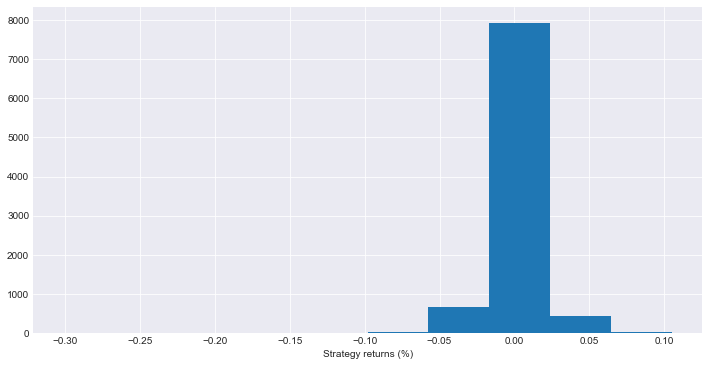

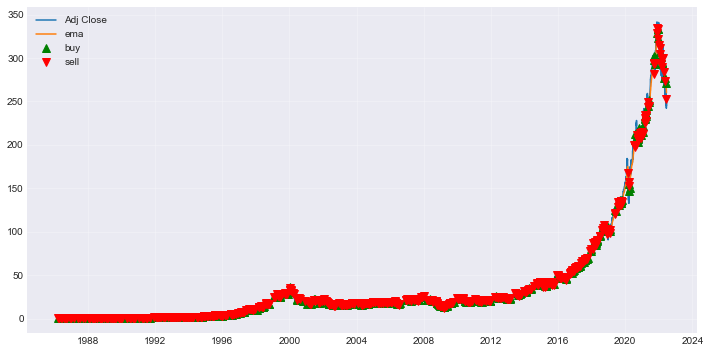

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


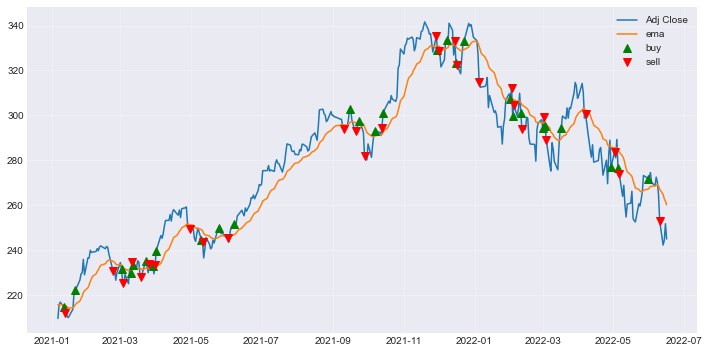

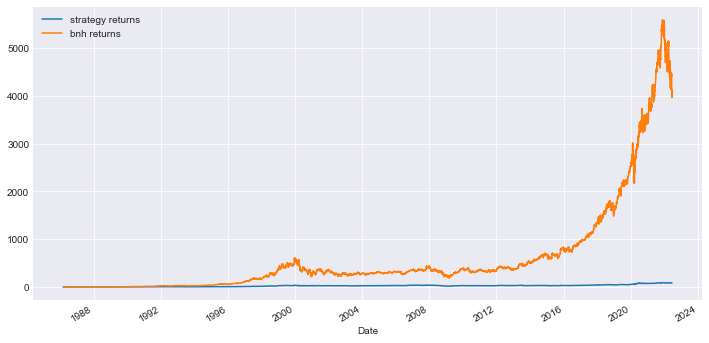

Start date,1986-03-14
End date,2022-06-16
Total months,435
,Backtest
Annual return,12.9%
Cumulative returns,8052.1%
Annual volatility,24.3%
Sharpe ratio,0.62
Calmar ratio,0.23
Stability,0.81
Max drawdown,-56.8%


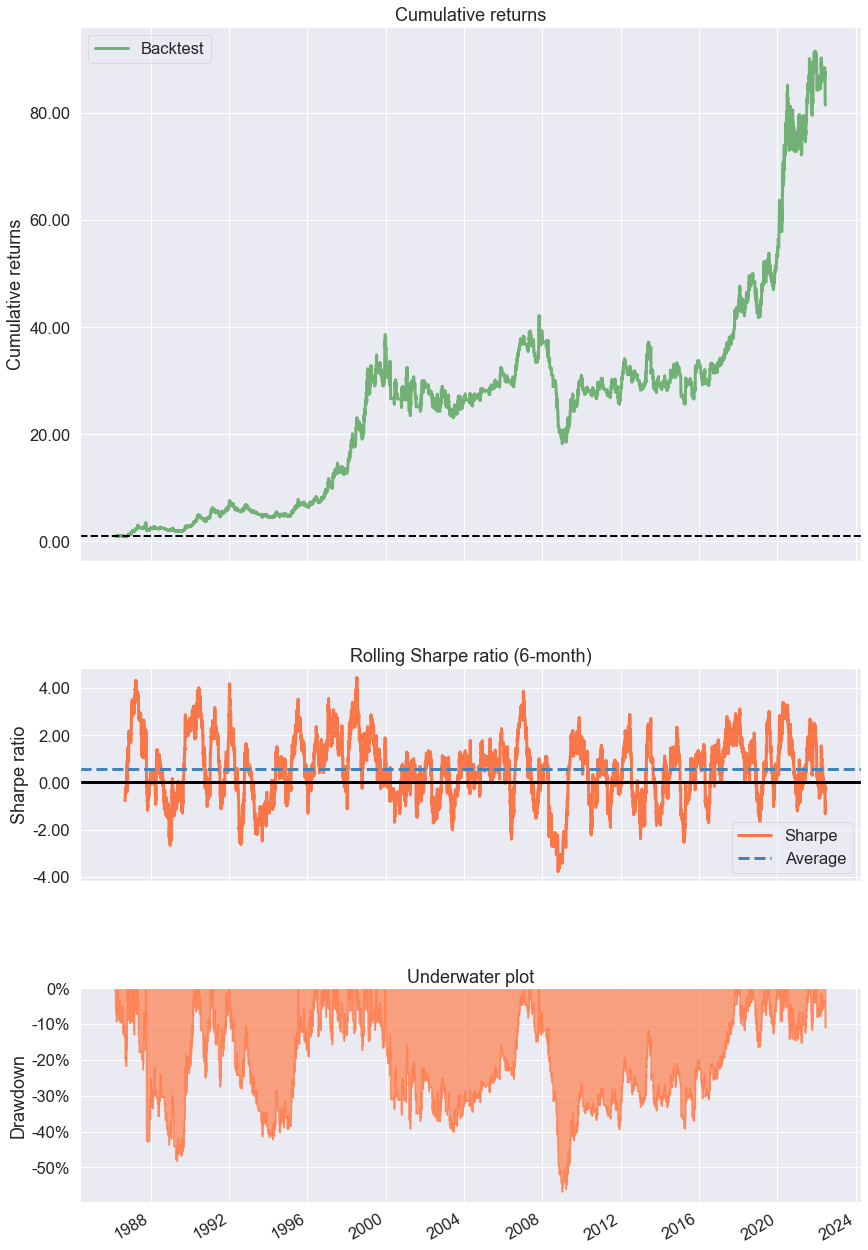

In [17]:
#Analysis

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6
data.strategy_returns.hist()
plt.xlabel('Strategy returns (%)')
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'], label = 'Adj Close')
plt.plot(data['ema'], label = 'ema')
plt.plot(data[data.entry == 1].index, data['Adj Close'][data.entry == 1], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[data.entry == -1].index, data['Adj Close'][data.entry == -1], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'][-365:], label = 'Adj Close')
plt.plot(data['ema'][-365:], label = 'ema')
plt.plot(data[-365:][data.entry == 1].index, data['Adj Close'][-365:][data.entry == 1], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[-365:][data.entry == -1].index, data['Adj Close'][-365:][data.entry == -1], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

(data.strategy_returns+1).cumprod().plot(label='strategy returns')
(data.returns+1).cumprod().plot(label='bnh returns')
plt.legend()
plt.show()

# general analytics)
pf.create_simple_tear_sheet(data.strategy_returns)